Maximum Voltage Analysis: Box Plot Representation

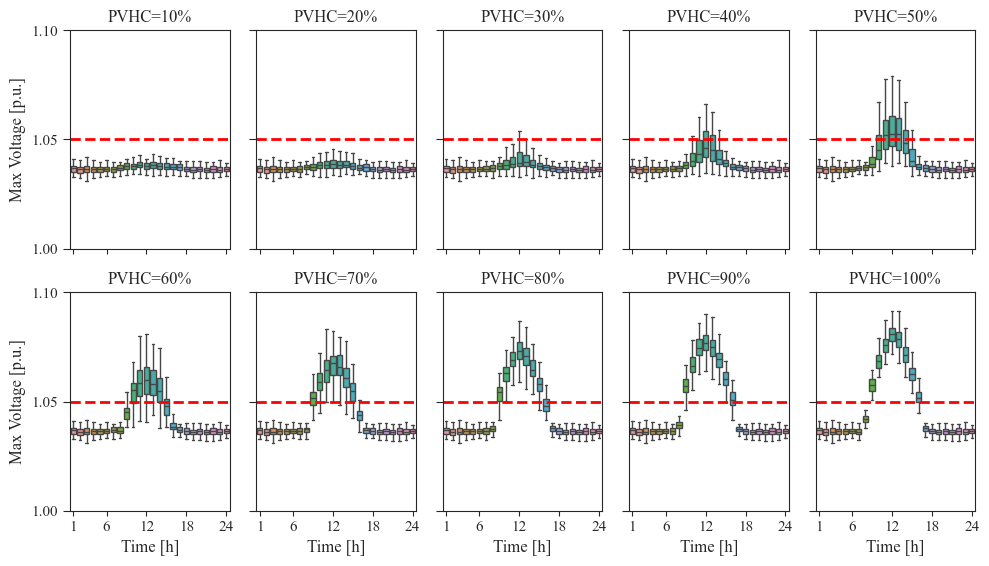

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set_style("ticks")
plt.rcParams['font.family'] = "Times New Roman"

# CSV file and setup
day = 'SOL'
csv_file = fr"C:\Mestrado\SMC_{day}.csv"
npfv_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
yticks = [1.0, 1.05, 1.1]

# Read CSV
df = pd.read_csv(csv_file)

# Create subplots: 2 rows x 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
axes = axes.flatten()

# Loop through each NPFV value and generate boxplot
for i, npfv in enumerate(npfv_values):
    ax = axes[i]
    npfv_data = df[df['NPFV'] == npfv]

    sns.boxplot(x='Hora', y='V_max', data=npfv_data, ax=ax, showfliers=False,
                boxprops=dict(linewidth=1), whiskerprops=dict(linewidth=1),
                capprops=dict(linewidth=1), medianprops=dict(linewidth=1))

    ax.set_title(f'PVHC={npfv}%', fontsize=12)
    ax.set_xticks([0, 5, 11, 17, 23])
    ax.axhline(y=1.05, color='red', linestyle='--', linewidth=2)

    if i in [5, 6, 7, 8, 9]:  # Subplots at the bottom row
        ax.set_xlabel('Time [h]', fontsize = 12)
    else:
        ax.set_xlabel('')
        ax.tick_params(axis = 'x', which = 'both', bottom = True, top = False, labelbottom = False)

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11, length=5)

    if i % 5 == 0:  # Left column plots
        ax.set_yticks(yticks)
        ax.set_ylabel('Max Voltage [p.u.]', fontsize = 12)
    else:
        ax.set_yticks(yticks)
        ax.set_yticklabels([])
        ax.set_ylabel('')

# Remove any unused subplots if fewer than total slots (not needed here, but good practice!)
for j in range(len(npfv_values), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()